In [435]:
########## Setup ##########
###########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
for_reg = RandomForestRegressor()
encoder = OneHotEncoder(sparse=False)
np.random.seed(42)

In [436]:
########## Load Data ##########
###############################
master = pd.read_csv('master.csv')

# Create a copy of the master dataframe to work on
working = master

In [437]:
########## Evaluate Data ##########
###################################

# View a sample of columns
print("""
master sample""")
master.head()



master sample


,ID,age,gender,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,...,usage_festivals,usage_reflection,usage_suggestions,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe,modify_suggestions,contribute
0,3,31 - 49,Female,Agree,Agree,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,...,Agree,Disagree,NaN,Agree,Strongly Agree,Neutral,Agree,Disagree,NaN,No thanks
1,4,50 - 70,Male,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,Strongly Agree,Agree,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,YES - I would be interested in becoming a vol...
2,5,50 - 70,male,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Agree,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,I would love to see a community hub and arts a...,YES - I would be interested in becoming a vol...
3,6,50 - 70,Female,Strongly Agree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Neutral,Agree,NaN,Neutral,Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,YES - I would be interested in becoming a vol...
4,7,50 - 70,Male,Strongly Agree,Agree,Strongly Agree,Disagree,Disagree,Strongly disagree,Strongly Agree,...,Neutral,Neutral,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,NaN,YES - I would be interested in becoming a vol...


In [438]:
# View summary of values
print("""
master summary
""", master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 22 columns):
ID                                 202 non-null int64
age                                202 non-null object
gender                             188 non-null object
usage_meeting_place                202 non-null object
usage_worship                      202 non-null object
usage_arts                         202 non-null object
usage_wellbeing                    202 non-null object
usage_connections                  202 non-null object
usage_model_sustainability         202 non-null object
usage_flexible_community/church    202 non-null object
activities_like_to_see             202 non-null object
usage_services                     202 non-null object
usage_festivals                    202 non-null object
usage_reflection                   202 non-null object
usage_suggestions                  41 non-null object
modify_exterior                    202 non-null object
modify_interior  

In [439]:
# 202 replies
# All but ID are objects (convert data to numerical)
# 188 gender (impute missing replies)
# 41 usage_other (don't fill but extract data)
# 79 float (don't fill but extract data)
# 176 contribute (don't fill but extract data)

In [440]:
# usage_other, activities_like_to_see, float, contribute all feature string data (not optional). 

# Create a working dataframe without these columns
working_short = working.drop(["ID", "usage_suggestions", "activities_like_to_see", "modify_suggestions", "contribute"], axis=1)

# Check
working_short.head()

,age,gender,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
0,31 - 49,Female,Agree,Agree,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Neutral,Agree,Disagree,Agree,Strongly Agree,Neutral,Agree,Disagree
1,50 - 70,Male,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
2,50 - 70,male,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,50 - 70,Female,Strongly Agree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Neutral,Agree,Neutral,Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,50 - 70,Male,Strongly Agree,Agree,Strongly Agree,Disagree,Disagree,Strongly disagree,Strongly Agree,Neutral,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree


In [441]:
########## Clean the data ##########
####################################

In [442]:
# Age

# View a tally of values
print("""
age sample
""", working_short["age"].value_counts())


age sample
 50 - 70    87
31 - 49    66
70 +       29
18 - 30    20
Name: age, dtype: int64


In [443]:
# Convert values to integers
working_short["age"].replace(["18 - 30", "31 - 49", "50 - 70", "70 +"], [0, 1, 2, 3], inplace=True)

# Check
print("""
modified age sample
""", working_short["age"].value_counts())

print("""
modified age summary
""", working_short.info())


modified age sample
 2    87
1    66
3    29
0    20
Name: age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
age                                202 non-null int64
gender                             188 non-null object
usage_meeting_place                202 non-null object
usage_worship                      202 non-null object
usage_arts                         202 non-null object
usage_wellbeing                    202 non-null object
usage_connections                  202 non-null object
usage_model_sustainability         202 non-null object
usage_flexible_community/church    202 non-null object
usage_services                     202 non-null object
usage_festivals                    202 non-null object
usage_reflection                   202 non-null object
modify_exterior                    202 non-null object
modify_interior                    202 non-null object
modify_sustainable_building        202 non-null 

In [444]:
# Gender

# View a tally of values
print("""
gender sample
""", working_short["gender"].value_counts())


gender sample
 Female             85
Male               50
Female             27
male               10
M                   3
female              3
female              2
Male                1
Neutral             1
Woman               1
Femalw              1
1 Male 1 Female     1
Can't remember      1
F                   1
Woman               1
Name: gender, dtype: int64


In [445]:
# Map values to summarised version (male, female and NB)
working_short["gender"] = working_short["gender"].map({"Female":"female", "Male":"male", "Female ":"female" ,"male":"male", "M":"male", "female":"female", "female ":"female", "Can't remember":"NB", "1 Male 1 Female":"male", "1 Male 1 Female":"female", "Woman":"female", "Male ":"male", "F":"female", "Femalw":"female", "Neutral":"NB", "Woman ":"female"})

# Check mapping
print("""
gender sample mapped
""", working_short["gender"].value_counts())


gender sample mapped
 female    122
male       64
NB          2
Name: gender, dtype: int64


In [446]:
# Convert values to integers
working_short["gender"].replace(["NB", "male", "female"], [0, 1, 2], inplace=True)

# Check
print("""
modified gender sample
""", working_short["gender"].value_counts())

print("""
modified gender summary
""", working_short.info())

# Converted to float? 


modified gender sample
 2.0    122
1.0     64
0.0      2
Name: gender, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
age                                202 non-null int64
gender                             188 non-null float64
usage_meeting_place                202 non-null object
usage_worship                      202 non-null object
usage_arts                         202 non-null object
usage_wellbeing                    202 non-null object
usage_connections                  202 non-null object
usage_model_sustainability         202 non-null object
usage_flexible_community/church    202 non-null object
usage_services                     202 non-null object
usage_festivals                    202 non-null object
usage_reflection                   202 non-null object
modify_exterior                    202 non-null object
modify_interior                    202 non-null object
modify_sustainable_building        202 n

In [447]:
# Usage/modify

# View a sample of values
print("""
usage/modify sample
""", working_short["usage_worship"].value_counts())


usage/modify sample
 Neutral              72
Strongly Agree       61
Agree                51
Disagree             12
Strongly disagree     6
Name: usage_worship, dtype: int64


In [448]:
working_short.replace(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], [0, 1, 2, 3, 4], inplace=True)

# Check
print("""
modified usage/modify sample
""", working_short["usage_worship"].value_counts())

print("""
modified usage/modify summary
""", working_short.info())


modified usage/modify sample
 2                    72
4                    61
3                    51
1                    12
Strongly disagree     6
Name: usage_worship, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
age                                202 non-null int64
gender                             188 non-null float64
usage_meeting_place                202 non-null int64
usage_worship                      202 non-null object
usage_arts                         202 non-null object
usage_wellbeing                    202 non-null int64
usage_connections                  202 non-null int64
usage_model_sustainability         202 non-null object
usage_flexible_community/church    202 non-null object
usage_services                     202 non-null int64
usage_festivals                    202 non-null int64
usage_reflection                   202 non-null int64
modify_exterior                    202 non-null int64
mo

In [449]:
# worship, arts, model_sustainability, flexible_community/church still have objects

# View a sample of the dataframe
working_short.head()

,age,gender,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
0,1,2.0,3,3,2,1,3,4,4,2,3,1,3,4,2,3,1
1,2,1.0,4,4,4,4,4,3,4,4,4,3,4,4,4,4,4
2,2,1.0,4,3,4,4,4,4,4,4,4,3,4,4,4,4,4
3,2,2.0,4,2,4,4,4,4,4,2,2,3,2,3,4,4,4
4,2,1.0,4,3,4,1,1,Strongly disagree,4,2,2,2,4,4,4,4,0


In [450]:
# "Strongly Disagree" also features as "Strongly disagree"

working_short.replace("Strongly disagree", 0, inplace=True)

# Check
print("""
modified usage/modify summary
""", working_short.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
age                                202 non-null int64
gender                             188 non-null float64
usage_meeting_place                202 non-null int64
usage_worship                      202 non-null int64
usage_arts                         202 non-null int64
usage_wellbeing                    202 non-null int64
usage_connections                  202 non-null int64
usage_model_sustainability         202 non-null int64
usage_flexible_community/church    202 non-null int64
usage_services                     202 non-null int64
usage_festivals                    202 non-null int64
usage_reflection                   202 non-null int64
modify_exterior                    202 non-null int64
modify_interior                    202 non-null int64
modify_sustainable_building        202 non-null int64
modify_layout_change               202 non-null int64
modify_cafe                  

In [451]:
# Fill missing data in gender
# Create the train_set and test_set

# test set
test_set = working_short[working_short.isna().any(axis=1)]
test_set = test_set.drop("gender", axis=1)

# check
test_set


,age,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
13,2,4,2,4,4,4,2,2,2,2,2,3,3,2,4,4
14,1,4,4,4,4,4,1,4,1,1,0,2,3,4,3,0
48,1,3,3,3,3,3,2,3,3,2,3,3,3,2,3,3
50,2,3,3,3,3,3,3,3,3,1,3,2,3,3,3,3
55,1,2,1,1,1,3,1,2,0,0,0,3,2,2,3,1
61,2,4,2,3,4,4,4,4,2,2,1,3,3,4,3,3
71,2,3,3,3,3,3,3,4,3,1,2,3,4,4,3,4
73,2,4,2,4,4,4,4,3,2,2,4,3,2,4,3,4
83,1,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3
84,2,4,2,4,3,4,4,3,2,2,3,2,2,3,3,3


In [452]:
# Create train_set
train_set = working_short.dropna()

# check
train_set

,age,gender,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
0,1,2.0,3,3,2,1,3,4,4,2,3,1,3,4,2,3,1
1,2,1.0,4,4,4,4,4,3,4,4,4,3,4,4,4,4,4
2,2,1.0,4,3,4,4,4,4,4,4,4,3,4,4,4,4,4
3,2,2.0,4,2,4,4,4,4,4,2,2,3,2,3,4,4,4
4,2,1.0,4,3,4,1,1,0,4,2,2,2,4,4,4,4,0
5,2,2.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2.0,3,2,3,3,3,3,2,2,1,1,3,3,4,3,3
7,1,2.0,4,2,2,3,4,2,2,2,2,4,3,2,2,2,4
8,1,1.0,4,0,3,3,4,3,2,2,3,2,3,4,3,4,4
9,3,1.0,4,4,4,4,4,4,4,4,4,4,3,3,3,4,4


In [453]:
# Create train_set predictors and labels

# predictors
train_set_predictors = train_set.drop("gender", axis=1)

# check
train_set_predictors



,age,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
0,1,3,3,2,1,3,4,4,2,3,1,3,4,2,3,1
1,2,4,4,4,4,4,3,4,4,4,3,4,4,4,4,4
2,2,4,3,4,4,4,4,4,4,4,3,4,4,4,4,4
3,2,4,2,4,4,4,4,4,2,2,3,2,3,4,4,4
4,2,4,3,4,1,1,0,4,2,2,2,4,4,4,4,0
5,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,3,2,3,3,3,3,2,2,1,1,3,3,4,3,3
7,1,4,2,2,3,4,2,2,2,2,4,3,2,2,2,4
8,1,4,0,3,3,4,3,2,2,3,2,3,4,3,4,4
9,3,4,4,4,4,4,4,4,4,4,4,3,3,3,4,4


In [454]:
# train_set_labels
train_set_labels = train_set["gender"].copy()

# check
train_set_labels

0      2.0
1      1.0
2      1.0
3      2.0
4      1.0
5      2.0
6      2.0
7      2.0
8      1.0
9      1.0
10     1.0
11     1.0
12     2.0
15     2.0
16     2.0
17     2.0
18     1.0
19     2.0
20     2.0
21     2.0
22     2.0
23     1.0
24     2.0
25     1.0
26     2.0
27     2.0
28     2.0
29     1.0
30     2.0
31     1.0
      ... 
172    2.0
173    1.0
174    2.0
175    1.0
176    2.0
177    2.0
178    2.0
179    2.0
180    2.0
181    2.0
182    2.0
183    2.0
184    2.0
185    2.0
186    1.0
187    2.0
188    2.0
189    2.0
190    2.0
191    2.0
192    1.0
193    2.0
194    1.0
195    2.0
196    0.0
197    2.0
198    1.0
199    2.0
200    2.0
201    1.0
Name: gender, Length: 188, dtype: float64

In [455]:
# Test regression algorithms

# Linear Regression
lin_reg.fit(train_set_predictors, train_set_labels)
scores = cross_val_score(lin_reg, train_set_predictors, train_set_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_score = np.sqrt(-scores)
lin_reg_score.mean()


0.5422551550082335

In [456]:
# Decision Tree Regressor
tree_reg.fit(train_set_predictors, train_set_labels)
scores = cross_val_score(tree_reg, train_set_predictors, train_set_labels, scoring="neg_mean_squared_error", cv=10)
tree_reg_score = np.sqrt(-scores)
tree_reg_score.mean()

0.7232357958994535

In [457]:
# Random Forest Regressor
for_reg.fit(train_set_predictors, train_set_labels)
scores = cross_val_score(for_reg, train_set_predictors, train_set_labels, scoring="neg_mean_squared_error", cv=10)
for_reg_score = np.sqrt(-scores)
for_reg_score.mean()

0.5446033837408811

In [458]:
# Decision Tree Regressor gives best result... 71-76%. Use to predict gender NaNs
predictions = tree_reg.predict(test_set)

# check
predictions

array([2., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2.])

In [459]:
# Convert to dataframe and provide index numbers
gender_predictions = pd.DataFrame(predictions, columns=['gender'], index=[13,14,48,50,55,61,71,73,83,84,103,106,149,162])

# check
gender_predictions

,gender
13,2.0
14,1.0
48,1.0
50,1.0
55,1.0
61,2.0
71,2.0
73,1.0
83,2.0
84,1.0


In [460]:
# Add gender_predictions to test_set
test_set_tr = gender_predictions.join(test_set)

# check
test_set_tr

,gender,age,usage_meeting_place,usage_worship,usage_arts,usage_wellbeing,usage_connections,usage_model_sustainability,usage_flexible_community/church,usage_services,usage_festivals,usage_reflection,modify_exterior,modify_interior,modify_sustainable_building,modify_layout_change,modify_cafe
13,2.0,2,4,2,4,4,4,2,2,2,2,2,3,3,2,4,4
14,1.0,1,4,4,4,4,4,1,4,1,1,0,2,3,4,3,0
48,1.0,1,3,3,3,3,3,2,3,3,2,3,3,3,2,3,3
50,1.0,2,3,3,3,3,3,3,3,3,1,3,2,3,3,3,3
55,1.0,1,2,1,1,1,3,1,2,0,0,0,3,2,2,3,1
61,2.0,2,4,2,3,4,4,4,4,2,2,1,3,3,4,3,3
71,2.0,2,3,3,3,3,3,3,4,3,1,2,3,4,4,3,4
73,1.0,2,4,2,4,4,4,4,3,2,2,4,3,2,4,3,4
83,2.0,1,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3
84,1.0,2,4,2,4,3,4,4,3,2,2,3,2,2,3,3,3


In [461]:
# Add test_set_tr to train_set
working_short_tr = pd.concat([train_set, test_set_tr], axis=0)
working_short_tr.sort_index(inplace=True)

# check
working_short_tr

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,age,gender,modify_cafe,modify_exterior,modify_interior,modify_layout_change,modify_sustainable_building,usage_arts,usage_connections,usage_festivals,usage_flexible_community/church,usage_meeting_place,usage_model_sustainability,usage_reflection,usage_services,usage_wellbeing,usage_worship
0,1,2.0,1,3,4,3,2,2,3,3,4,3,4,1,2,1,3
1,2,1.0,4,4,4,4,4,4,4,4,4,4,3,3,4,4,4
2,2,1.0,4,4,4,4,4,4,4,4,4,4,4,3,4,4,3
3,2,2.0,4,2,3,4,4,4,4,2,4,4,4,3,2,4,2
4,2,1.0,0,4,4,4,4,4,1,2,4,4,0,2,2,1,3
5,2,2.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2.0,3,3,3,3,4,3,3,1,2,3,3,1,2,3,2
7,1,2.0,4,3,2,2,2,2,4,2,2,4,2,4,2,3,2
8,1,1.0,4,3,4,4,3,3,4,3,2,4,3,2,2,3,0
9,3,1.0,4,3,3,4,3,4,4,4,4,4,4,4,4,4,4


In [462]:
# Encode age using OneHotEncoder
enc = pd.DataFrame(encoder.fit_transform(working_short_tr[["gender", "age"]]))

enc.columns = encoder.get_feature_names(["gender", "age"])

# Join to working_short dataframe
working_short_tr_encoded = enc.join(working_short_tr)

# Drop age from working_short
#working_short_tr_encoded = working_short_tr_encoded.drop(["gender", "age"], axis=1)

# Check 
working_short_tr_encoded.head()


,gender_0.0,gender_1.0,gender_2.0,age_0,age_1,age_2,age_3,age,gender,modify_cafe,...,usage_arts,usage_connections,usage_festivals,usage_flexible_community/church,usage_meeting_place,usage_model_sustainability,usage_reflection,usage_services,usage_wellbeing,usage_worship
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,2.0,1,...,2,3,3,4,3,4,1,2,1,3
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,4,...,4,4,4,4,4,3,3,4,4,4
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,4,...,4,4,4,4,4,4,3,4,4,3
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2.0,4,...,4,4,2,4,4,4,3,2,4,2
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,0,...,4,1,2,4,4,0,2,2,1,3


In [463]:
########## Analysis ##########
##############################

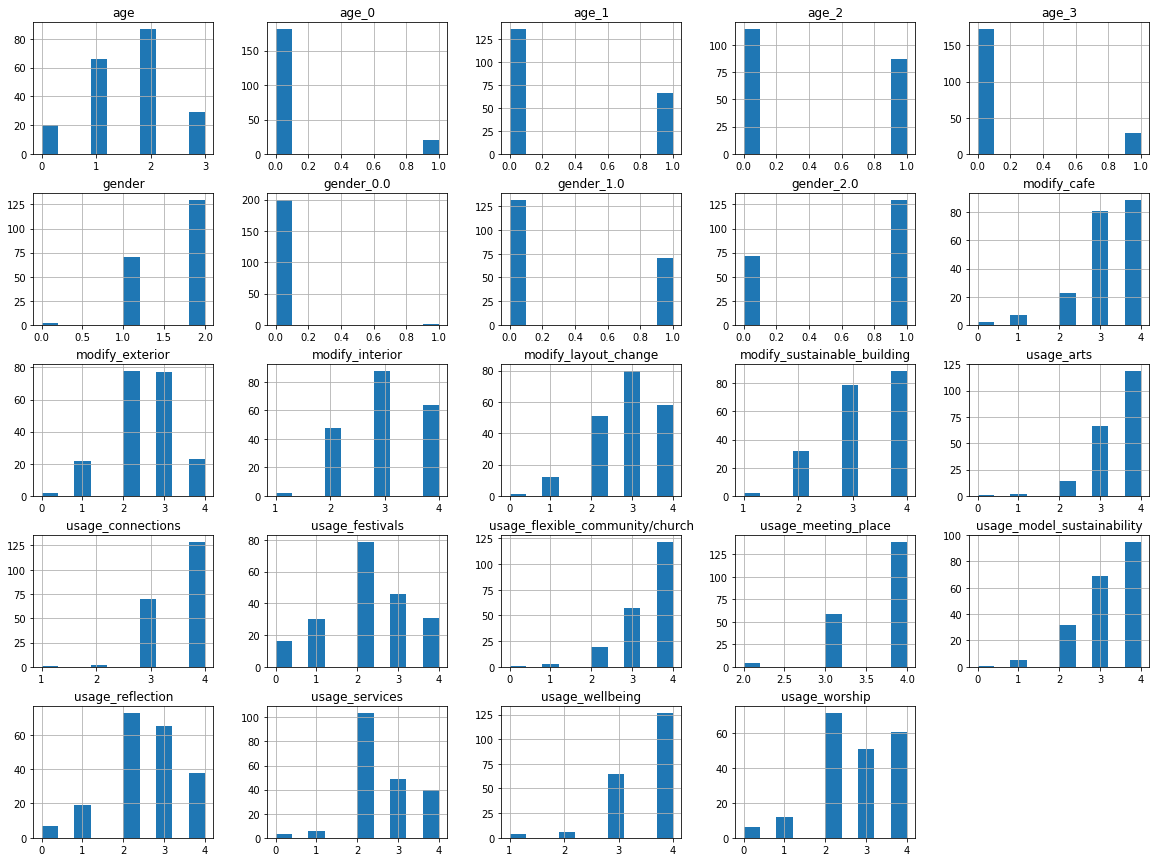

In [464]:
# Create a series of histograms
working_short_tr_encoded.hist(figsize=(20,15))
plt.show()

In [465]:
# Deductions...

# Age
# The majority of respondants are in age groups 1 and 2

# Gender
# 2/3 of respondants are in group 2

# Modifications
# Significant majority strongly/agree to a cafe
# Minority disagree to modifying the exterior with equal majority weighting in neutral/agree
# Most people strongly/agree to modifying interior. More people disagree to modifying exterior than disagree to modifying interior
# Significant majority strongly/agree or are neutral to modifying layout to building. 
# Signifcant majority agree to improving the sustainability of the building

# Usage
# The majoroty of respondants strongly/agree to the useage suggestions
# The least popular suggestion is usage_festivals, though the majority agree. 2nd least is usage_worship, though again majority agree.
# Neutral is the most popular response for usage_festivals, usage_services, usage_worship, and useage_reflection



In [466]:
corr_matrix = working_short_tr_encoded.corr()

In [467]:
corr_matrix["age"].sort_values(ascending=False)

age                                1.000000
age_3                              0.665965
age_2                              0.390457
usage_flexible_community/church    0.234925
usage_meeting_place                0.210555
modify_interior                    0.186436
usage_model_sustainability         0.159434
usage_services                     0.154962
usage_worship                      0.154902
modify_sustainable_building        0.148316
usage_connections                  0.127123
modify_exterior                    0.113931
usage_reflection                   0.087514
usage_festivals                    0.060026
gender_1.0                         0.057375
usage_wellbeing                    0.054341
gender_0.0                         0.044891
modify_cafe                        0.037758
usage_arts                         0.035662
modify_layout_change               0.034784
gender_2.0                        -0.066287
gender                            -0.072106
age_1                           